# Supervised Learning Capstone Project

In this notebook, telecom customer data was read in to determine whether customer churn can be predicted. As shown below, both random forest and logistic regression modelling yielded similar results with accuracies of ~80% on the test set data.

One key insight from the data was also that customers with month-to-month contracts are more likely to churn than other customers. In this subset of customers, the shorter tenure a customer has the higher they are to churn.

<i>Please note that this project was done as part of the 2021 Python for Machine Learning & Data Science Masterclass on Udemy</i>

Note that this code is also posted on my Portfolio page: <a href="https://akstl1.github.io/2021/08/01/Customer-Churn.html">Supervised Learning Capstone Project Portfolio Link<a/>.





### Summary of Results

Based on the models run, customer churn can be predicted with ~79% accuracy via a random forest or logistic regression model.

From our EDA, it appears that contract type in particular can be important in predicting churn. Specifically, customers who are on a month to month plan are more likely to churn than other contract types, and especially those who have had plans for 0-12 months.

In the future, a company could use models to predict whether a customer is likely to churn, enact an intervention strategy to prevent churn, and optimize business strategy to proactively minimize churn.

## Import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

### Load Data

First I load in the relevant data.

In [2]:
df = pd.read_csv('./DATA/Telco-Customer-Churn.csv')

### Data Structure And Information Exploration

After loading in the data I look at the data structure, check for null values to determine whether imputation/deletion is required, and view column descriptive statistics to get a high-level summary of the quantitative data.

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Based on the above, I see that there are no null values in the data and thus no imputation/deletion is needed.

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Visual Exploration

Now that I have a better sense of data structure and overall statistics, I can explore the data visually.

First I will drop the customerID column since this is unique for each row and not useful for classification or visualization.

In [3]:
df.drop('customerID', axis=1, inplace=True)

Next I will generate a countplot of customer churn to see whether the target data is imbalanced.

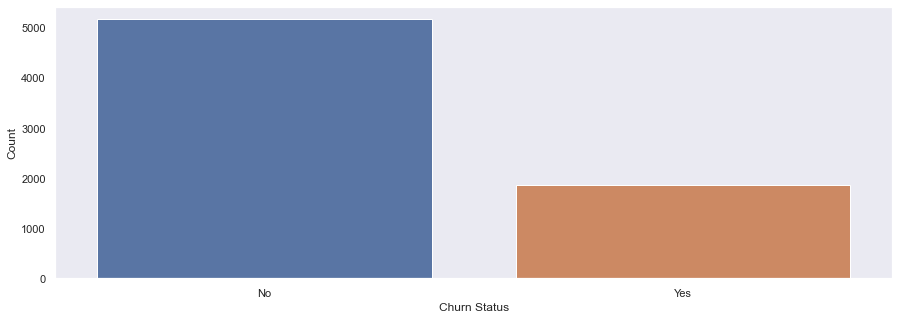

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Churn')
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.ylabel("Count")
plt.xlabel("Churn Status")
plt.savefig('./Supervised Learning Capstone Images/1_churn_count_plot.png')

Based on the above plot, I see that the data is imbalanced, with ~2.5x No's than Yes'

Next I will plot customer churn vs TotalCharges via a violin plot. This can help me understand the distribution of the target variable and if there are any trends or target areas for further analysis.

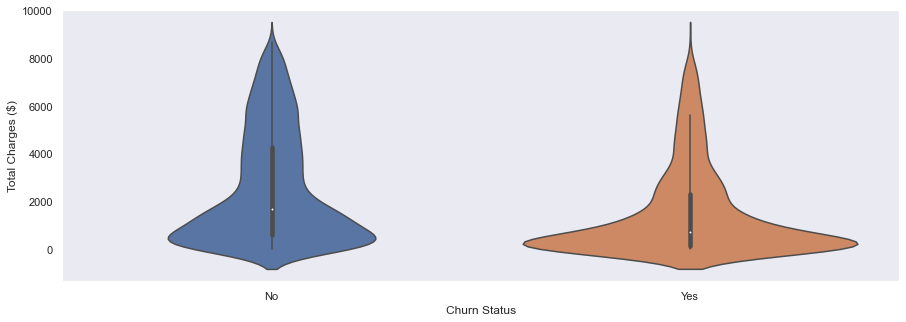

In [10]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df,y='TotalCharges',x='Churn')
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.xlabel("Churn Status")
plt.ylabel("Total Charges ($)")
plt.savefig('./Supervised Learning Capstone Images/2_churn_violin_plot.png')

In the above, I see that there is a jump in TotalChares at ~$1000.

Next, I will plot contract types vs TotalCharges, with a hue of Churn, in boxplots. This can help me determine whether contract type appears to have an influence on churn.

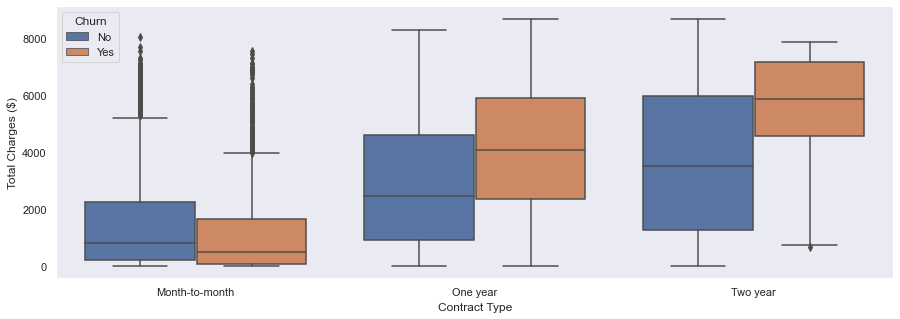

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.xlabel("Contract Type")
plt.ylabel("Total Charges ($)")
plt.savefig('./Supervised Learning Capstone Images/3_contract_bar_plot.png')

Finally, I will create a correlation matrix for features with the churn variable

In [16]:
#use df.head as a refresher of the df structure and columns
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [15]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

### Plot the correlation of features with churn

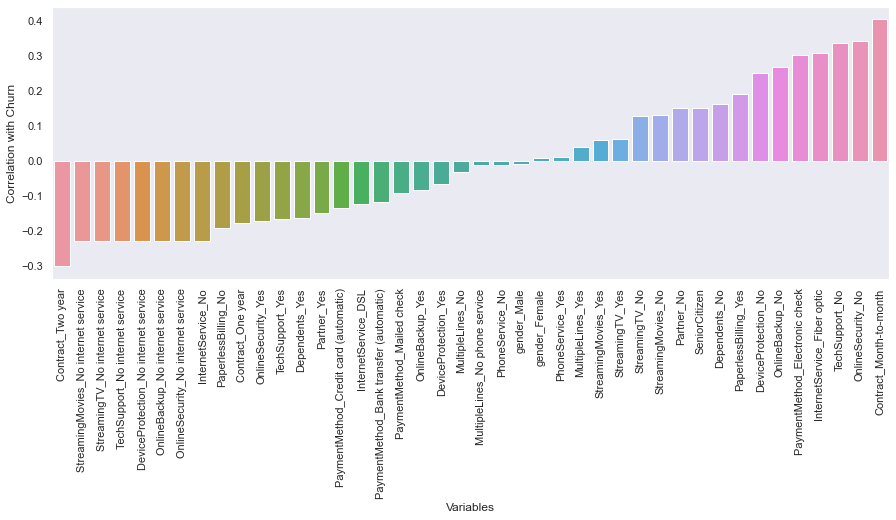

In [16]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index, y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.xlabel("Variables")
plt.ylabel("Correlation with Churn")
plt.savefig('./Supervised Learning Capstone Images/4_correlation_plot.png')

Based on the above, contract month-to-month appears to have the highest correlation to churn. Let's conduct more analysis with the contract features below.

 # Churn Analysis

Now that I have explored the data, I can begin to analyze churn in the dataset.

### Tenure and Contract Type Anaysis 

First I will analyze tenure and contract type as they relate to churn, since churn is correlated highly with monthly contracts and we want customers to have higher tenure with the company.

To start, I will confirm the different contract types.

In [20]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Next I will create a historgram displaying the distribution of the tenure column, which is the amount of time a customer has been / was a customer.

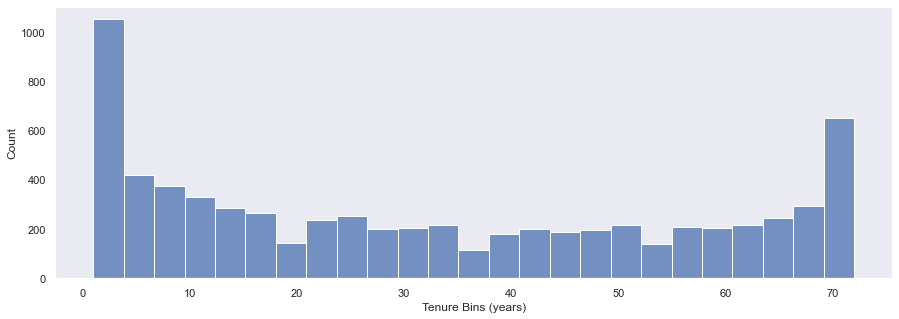

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='tenure',bins=25)
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.xlabel("Tenure Bins (years)")
plt.ylabel("Count")
plt.savefig('./Supervised Learning Capstone Images/5_tenure_count.png')

There is a wide distribution of tenure in this dataset, with several apparent spikes around 3 months and 70 months. 

Next, I will plot tenure partitioned by each contract type and customer churn target values.

<Figure size 3000x1000 with 0 Axes>

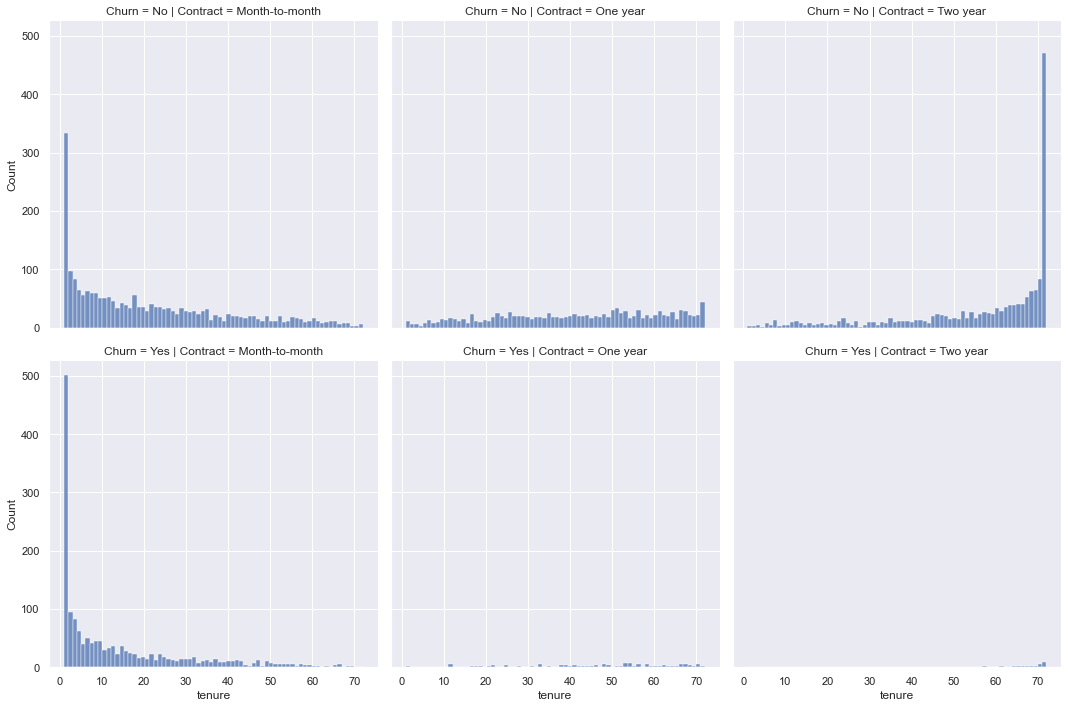

In [20]:
plt.figure(figsize=(15,5),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.savefig('./Supervised Learning Capstone Images/6_tenure_churn_contract_plots.png')

Based on the above, it would appear that customers with month-to-month contracts tend to have high churn early and then relatively small churn numbers thereafter. 

For one and two year contracts, there does not appear to be a spike or pattern indicating how long it take these customers to  churn on average.

### Monthly Charge Analysis

In addition to tenure, another characteristic at our disposal is the monthly charge figure. To see whether monthly charges have an impact on churn, I make a scatter plot of Total Charges vs Monthly Charges, and color hue by Churn.

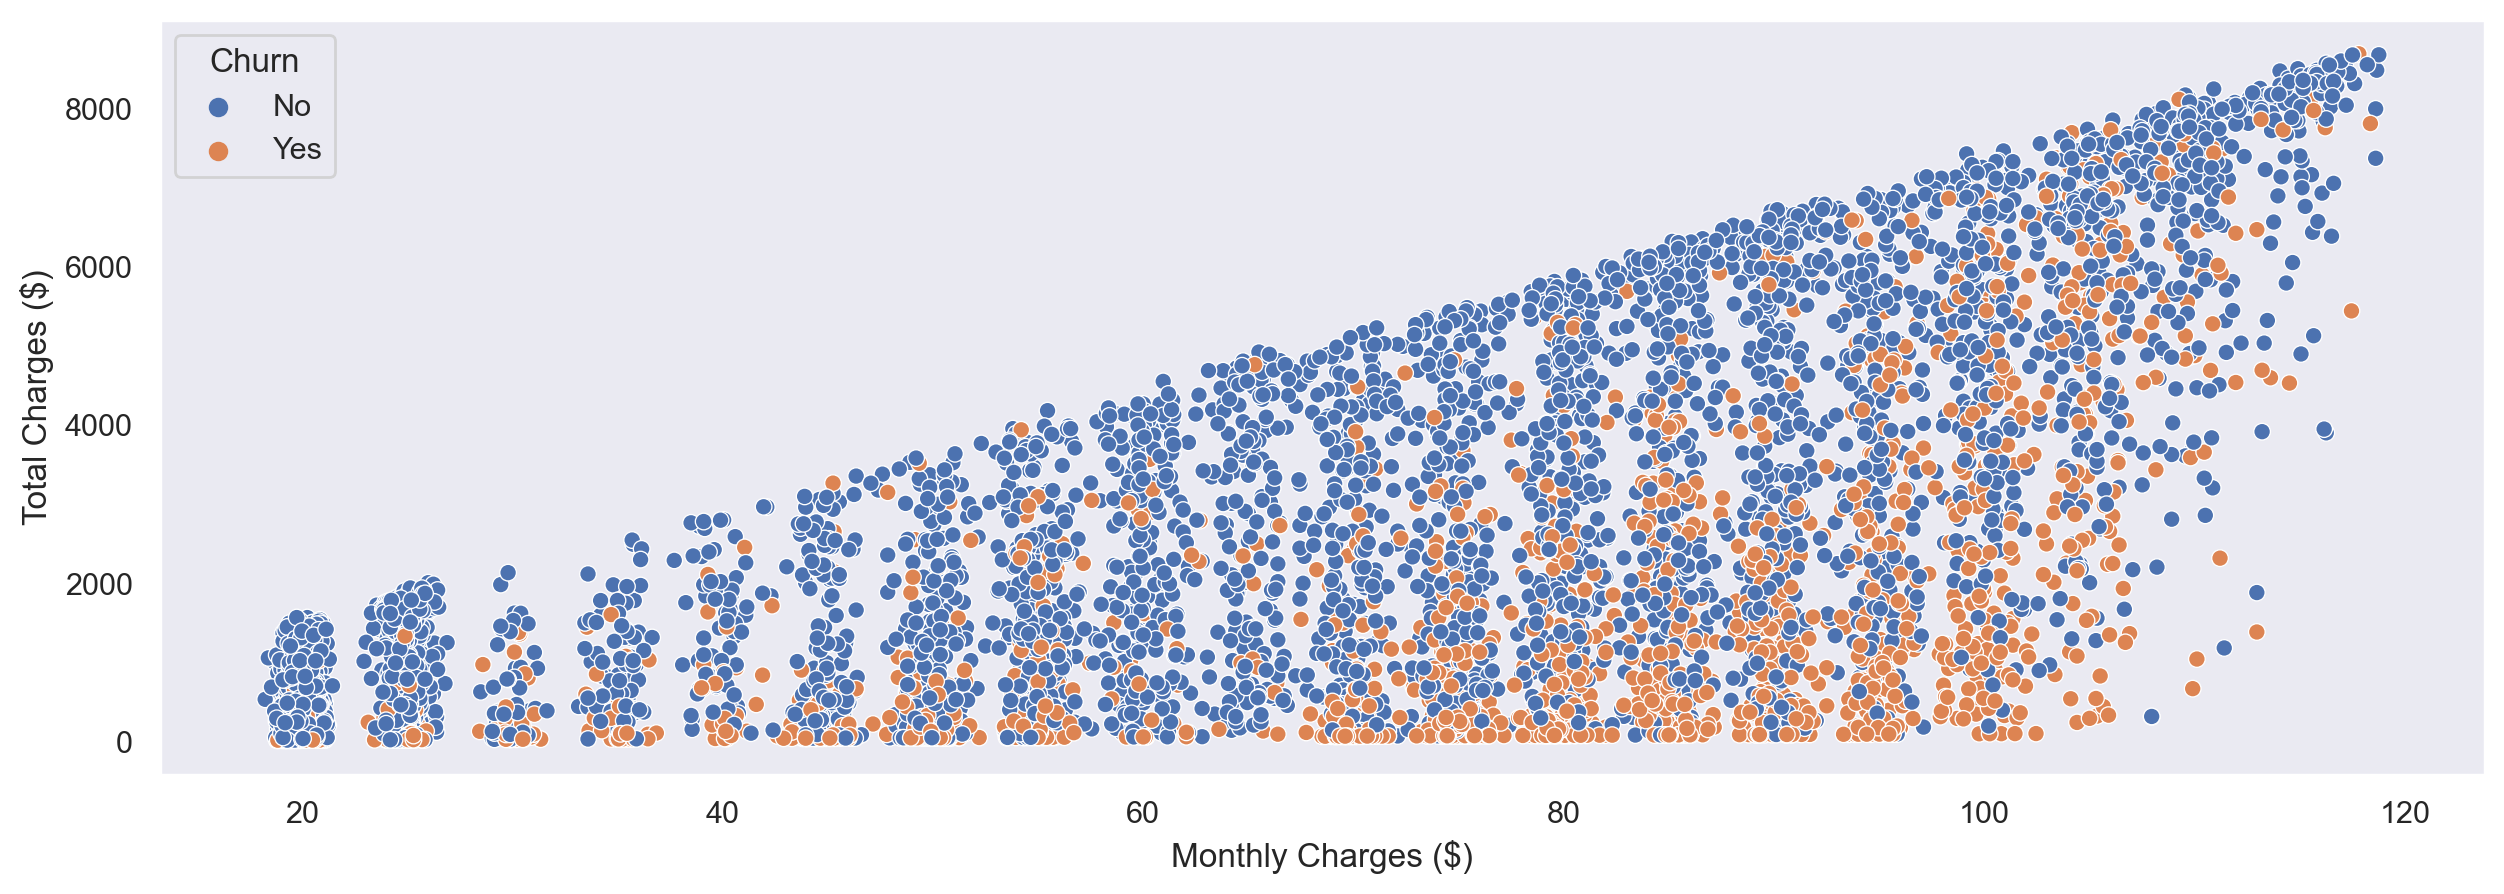

In [21]:
plt.figure(figsize=(15,5),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Total Charges ($)")
plt.savefig('./Supervised Learning Capstone Images/7_monthlycharges_totalcharges.png')

As seen above, customers are shown to churn at many different MonthlyCharges values. However, there does appear to be more churn as MonthlyCharges get higher.

### Creating Cohorts based on Tenure

Next, I will treat each tenure group as a cohort, and calculate the Churn rate per cohort.

In [23]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
churn_rate = 100*yes_churn / (no_churn+yes_churn)


In [24]:
churn_rate.transpose()['gender']


tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: gender, Length: 72, dtype: float64

With the above data created, I will now plot churn rate per month.

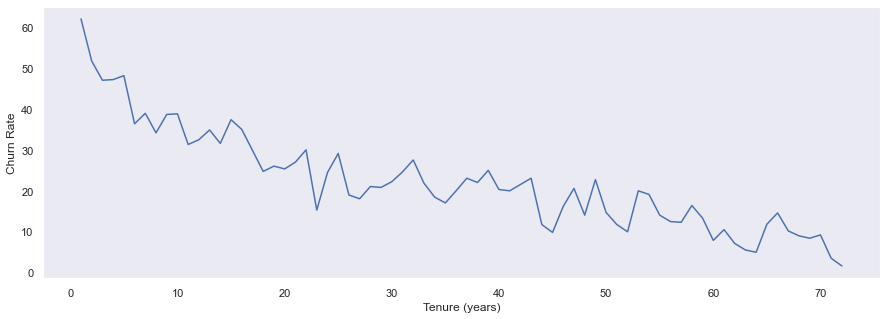

In [25]:
plt.figure(figsize=(15,5))
churn_rate.iloc[0].plot()
plt.ylabel('Churn Rate')
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.xlabel("Tenure (years)")
plt.savefig('./Supervised Learning Capstone Images/8_tenure_churn_timeplot.png')

As seen above, it appears that the generally, higher tenure correlates with lower churn rates.

Based on the tenure column values above, I can create a new column called Tenure Cohort that create 4 categories:
- 0-12 months
- 12-24 months
- 24-48 months
- over 48 months

In [26]:
# the function below adds a new column based on tenure cohort values above

def tenure_cohort(tenure):
    if tenure<13:
        return '0-12 months'
    elif tenure<25:
        return '12-24 months'
    elif tenure<49:
        return '24-48 months'
    return 'over 48 months'

In [27]:
df['tenure_cohort'] = df['tenure'].apply(tenure_cohort)

With the new cohort column created, I can now create a scatter plot of total charges vs monthly costs, colored by tenure cohort

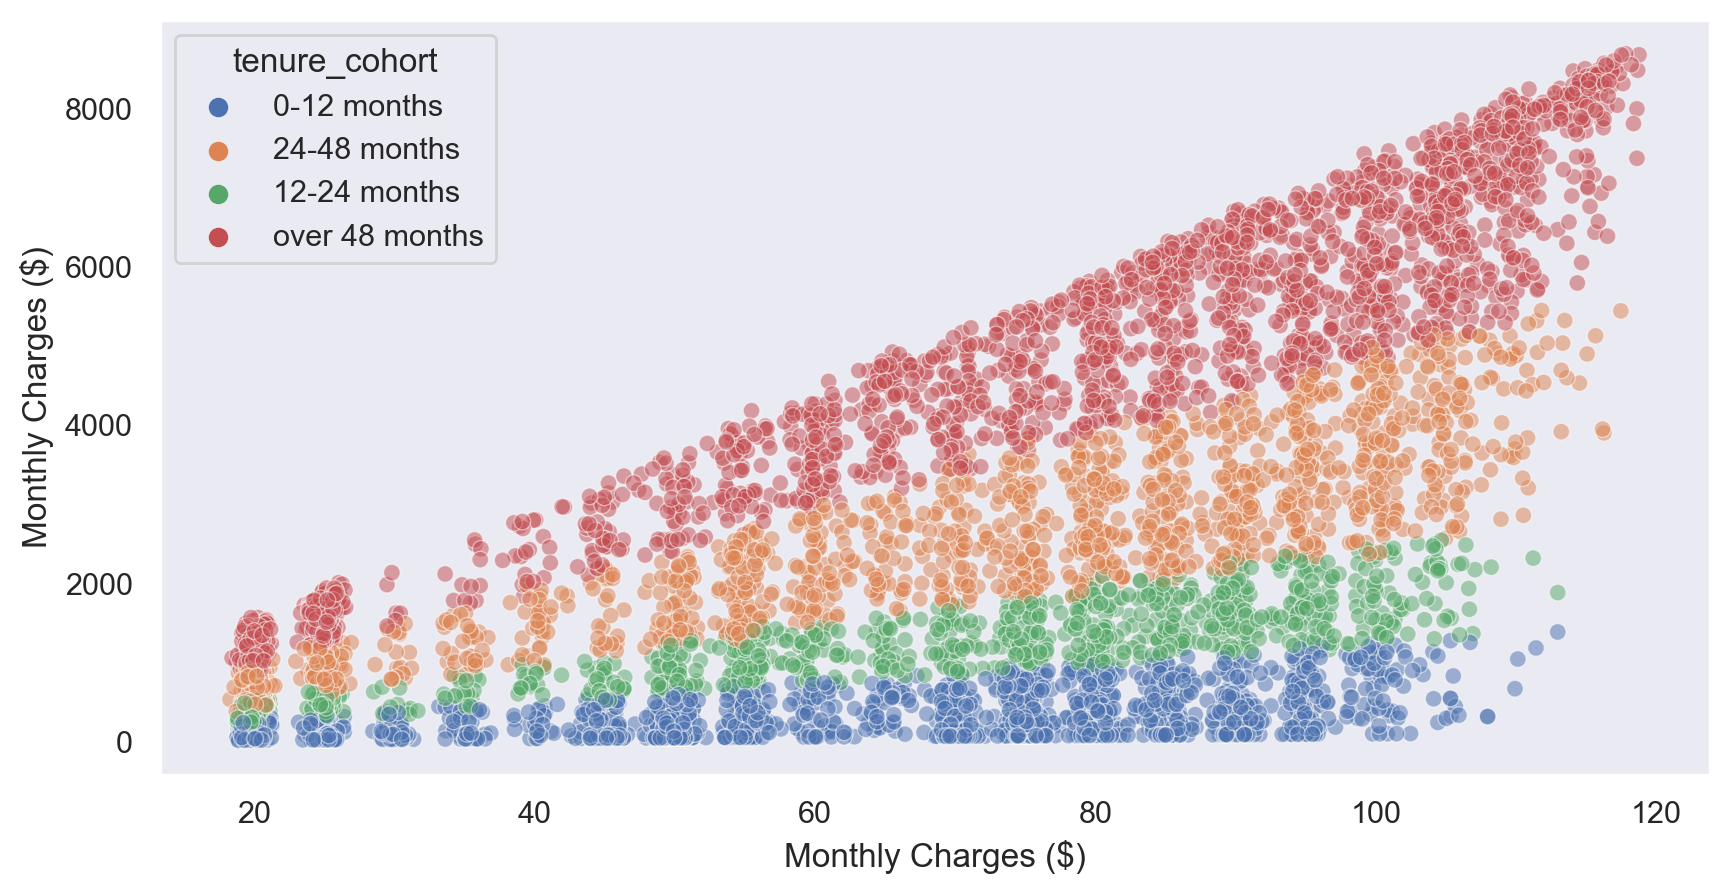

In [28]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='tenure_cohort', alpha=0.5)
sns.set(rc={'figure.facecolor':'white'})
plt.grid(False)
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Monthly Charges ($)")
plt.savefig('./Supervised Learning Capstone Images/9_monthlycharges_totalcharges_cohorts.png')


The chart above appears to show that customers with higher tenure tend to have higher TotalCharges and MonthlyCharges. The TotalCharges trend makes sense, since older customers have had more pay cycles and thus have higher cumulative charges on their accounts. 

There could be several explanations for why newer customers tend to have lower rates, including that they may get low promotional rates to join the company and they haven't had as much time to have their monthly rates increased.

Since it appears that the cohorts are in clear 'bands' above, I will create a count plot showing the churn count per cohort to better quantify this trend.

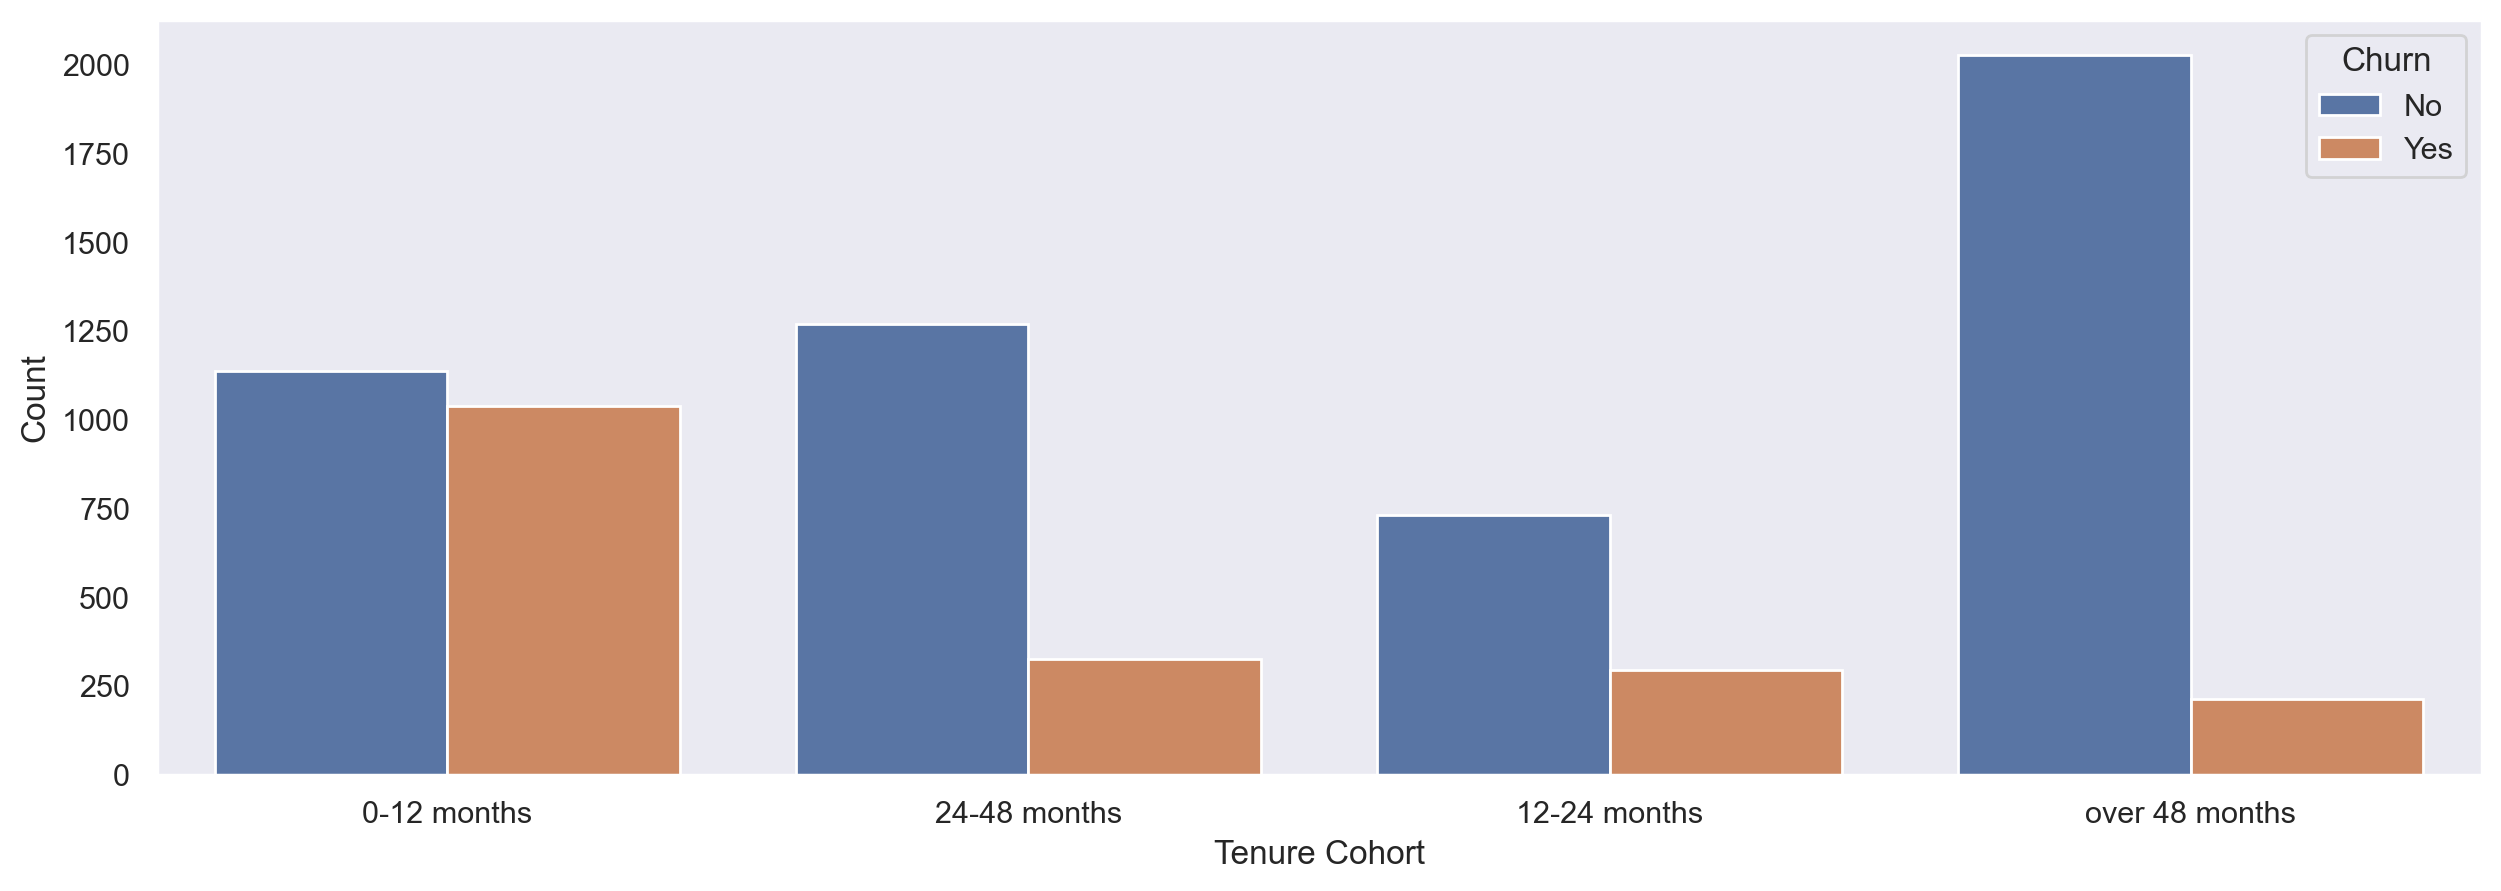

In [29]:
plt.figure(figsize=(15,5),dpi=200)
sns.countplot(data=df,x='tenure_cohort',hue='Churn')
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.xlabel("Tenure Cohort")
plt.ylabel("Count")
plt.savefig('./Supervised Learning Capstone Images/10_cohort_churn_count.png')

<Figure size 3000x1000 with 0 Axes>

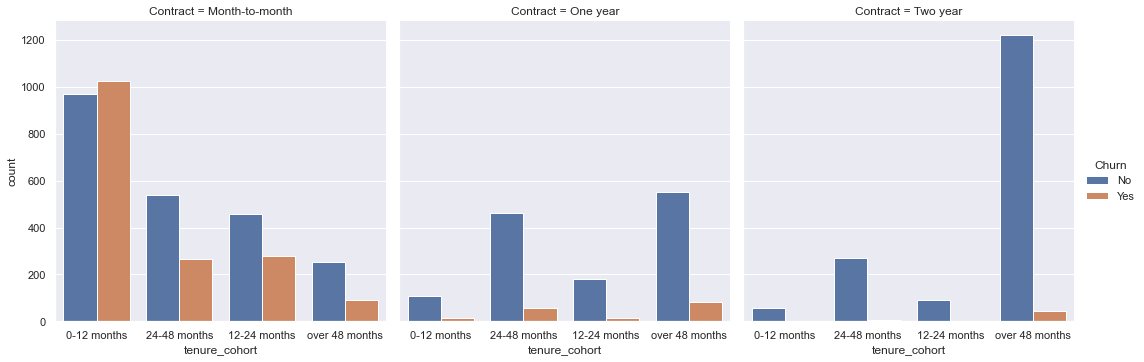

In [30]:
plt.figure(figsize=(15,5),dpi=200)
g = sns.catplot(x="tenure_cohort", hue="Churn", col="Contract",data=df, kind="count")
sns.set(rc={'figure.facecolor':'white'})
plt.savefig('./Supervised Learning Capstone Images/11_tenure_cohort_churn_count.png')

From the above two plots, I see that churn numbers are highest within the first 12 months of tenure.

Further, much of the churn both in the first 12 months and overall occurs in month-to-month contracts.

# Predicting Customer Churn

After exploring and analyzing the provided data, I can now create a predictive model to help the telecom company identify likelihood of churn and perform an intervention / program to provent churn.

## Prepare the data for Modelling

First I split the data into input and target feature sets

In [32]:
X=df.drop('Churn', axis=1)
y=df['Churn']

Next I get dummies for categorical values so that they can be included in machine learning model processes.

In [33]:
X = pd.get_dummies(X,drop_first=True)

I perform a train test split of the data so that data can be used to both train a model and validate it's effectiveness.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Some models, like random forests, do not require feature scaling. Scaling will be performed for models that require it in the below

## Random Forest Modelling

### Import accuracy metrics and model

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report

Perform grid search to find optimal params

In [37]:
rf_model = RandomForestClassifier()

In [38]:
param_grid = {'n_estimators':[50,100],
             'max_depth': [2,4,6,8,10]}

In [39]:
grid = GridSearchCV(rf_model,param_grid)

In [40]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100]})

In [41]:
grid.best_params_

{'max_depth': 8, 'n_estimators': 50}

Use the best parameters to create a random forest model and assess its accuracy/metrics.

In [42]:
preds = grid.predict(X_test)

<Figure size 1080x360 with 0 Axes>

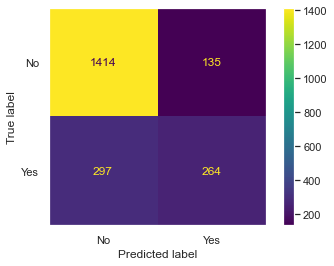

In [43]:
plt.figure(figsize=(15,5))
plot_confusion_matrix(grid,X_test,y_test)
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.savefig('./Supervised Learning Capstone Images/12_random_forest_confusion_plot.png')

In [45]:
accuracy_score(y_test,preds)

0.7933649289099526

In [46]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.82      0.91      0.87      1549
         Yes       0.66      0.46      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



From the above, we see that a random forest model is ~79% accurate overall.

## Logistic Regression

Now I will try implementing a logistic regression model on this data, to see whether we can get better results than the above.

The data is already split, however we need to scale our data so the model can run optimally, since regressors are more sensitive to data being placed at different scales.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [47]:
log_model = LogisticRegression()

In [48]:
penalty = ['l1','l2','elastic_net']
l1_ratio = np.linspace(0,10,20)
C = np.logspace(0,10,20)
param_grid = {'l1_ratio':l1_ratio, 'penalty':penalty, 'C':C}

In [ ]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)
grid_model.fit(scaled_X_train,y_train)

In [50]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [51]:
y_pred = grid_model.predict(scaled_X_test)

In [63]:
accuracy_score(y_test,y_pred)

0.7919431279620853

<Figure size 1080x360 with 0 Axes>

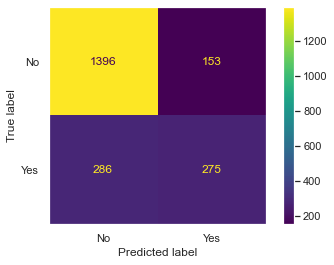

In [52]:
plt.figure(figsize=(15,5))
plot_confusion_matrix(grid_model,scaled_X_test,y_test)
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.savefig('./Supervised Learning Capstone Images/13_logistic_confusion_plot.png')

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1549
         Yes       0.64      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



I see very similar accuracy scores and confusion matrix results for both random forest and logistic regression models.

## KNN

Finally, I conduct a KNN model.

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_clf = KNeighborsClassifier()

In [56]:
param_grid_knn = {'n_neighbors':[2,5,7,10]}

In [57]:
grid_knn = GridSearchCV(knn_clf,param_grid_knn)

In [58]:
grid_knn.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 7, 10]})

In [59]:
grid_knn.best_params_

{'n_neighbors': 7}

In [60]:
knn_preds = grid_knn.predict(scaled_X_test)

<Figure size 1080x360 with 0 Axes>

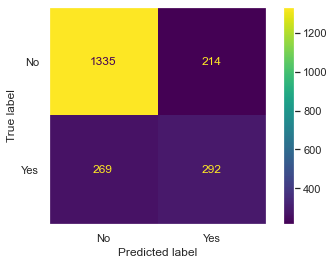

In [61]:
plt.figure(figsize=(15,5))
plot_confusion_matrix(grid_knn,scaled_X_test,y_test)
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})
plt.savefig('./Supervised Learning Capstone Images/14_knn_confusion_plot.png')

In [207]:
print(classification_report(y_test,knn_preds))

              precision    recall  f1-score   support

          No       0.83      0.86      0.85      1549
         Yes       0.58      0.52      0.55       561

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110



The KNN model performs slightly worse than our other two models.

# Results

### Summary of Model Performance

|Model|Weighted Avg Precision | Weighted Avg Recall| Weighted Avg F1-score|Accuracy
|---|---|---|---|---|
|Random Forest|0.78|0.79|0.78|0.79|
|Logistic Regression|0.78|0.79|0.78|0.79|
|KNN|0.76|0.77|0.77|0.77|

### Conclusion

Based on the models run, customer churn can be predicted with ~79% accuracy via a random forest or logistic regression model.

From our EDA, it appears that contract type in particular can be important in predicting churn. Specifically, customers who are on a month to month plan are more likely to churn than other contract types, and especially those who have had plans for 0-12 months.

### Next Steps

In the future, a company could use one of the above models to predict whether a customer is likely to churn. With this information, the company could then decide how (and whether) to intervene and prevent the customer from cancelling service.

The company could also evaluate the factors most correlated with churn and determine whether they can alter their strategy and reduce churn from particular components of the business.